# Практическая работа 1
Подготовка данных и обучение модели для прогнозирования качества вина
выполнила Костылева ЭП ИВТ 3 курс 1гр 1пгр

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.dummy import DummyClassifier
import pickle

### 1. Чтение данных

In [ ]:
# Загрузка данных из одного файла WineQT.csv
try:
    df = pd.read_csv('WineQT.csv')
except FileNotFoundError:
    print("Файл 'WineQT.csv' не найден. Пожалуйста, убедитесь, что он находится в той же директории.")
    df = pd.DataFrame() # Создаем пустой DataFrame, если файл не найден

### 2. Первичный анализ

Размерность данных: (1143, 13)

Первые 5 строк:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4 

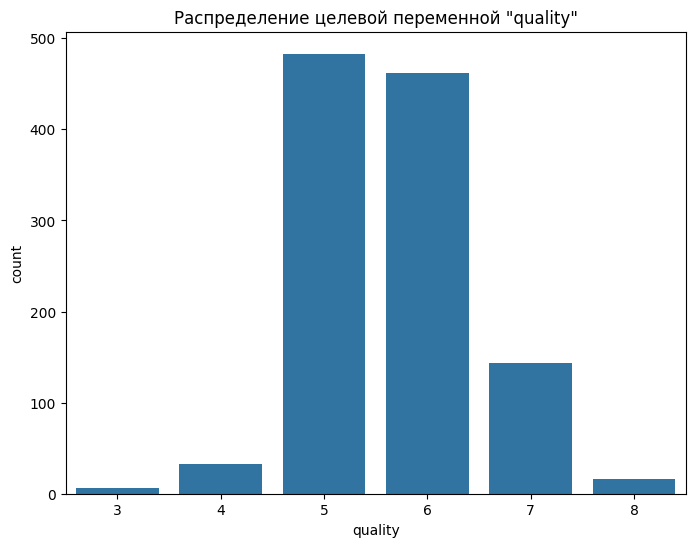

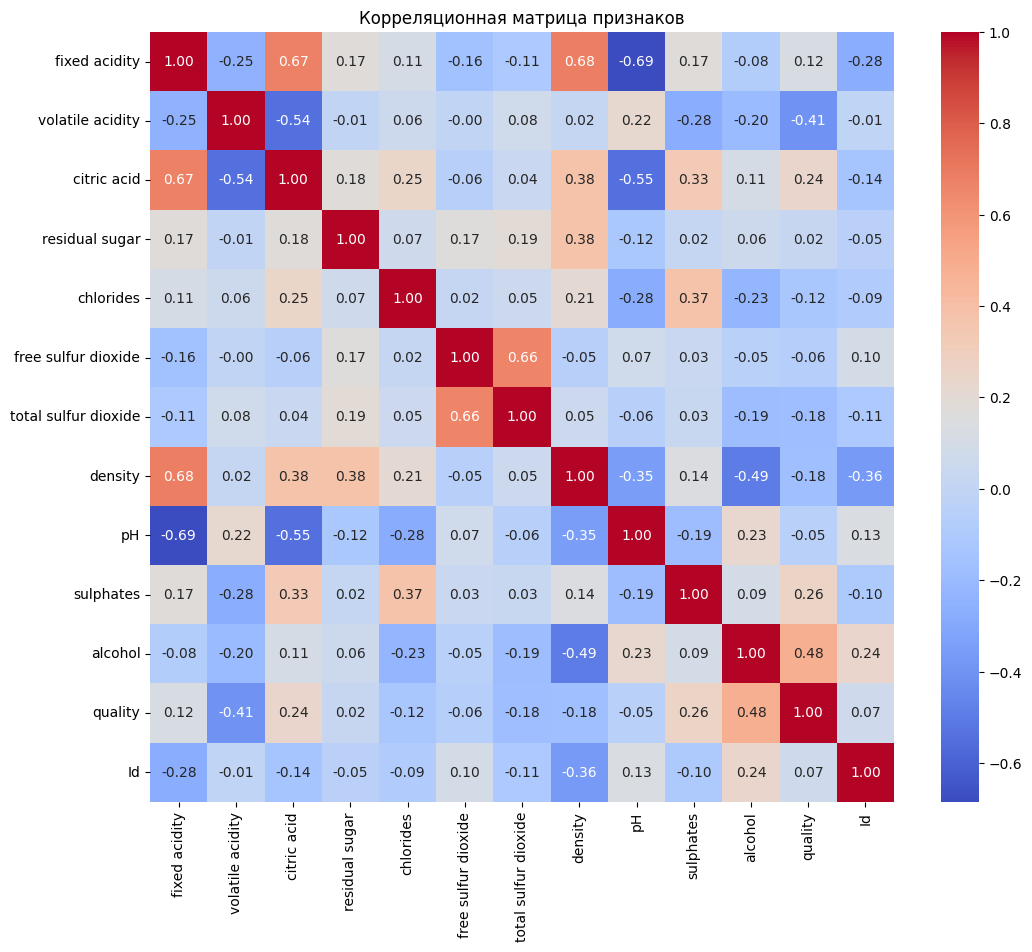

In [ ]:
if not df.empty:
    print("Размерность данных:", df.shape)
    print("\nПервые 5 строк:\n", df.head())
    print("\nСтатистическое описание:\n", df.describe())
    print("\nТипы данных:\n", df.dtypes)
    print("\nПропущенные значения:\n", df.isnull().sum())

    plt.figure(figsize=(8, 6))
    sns.countplot(x='quality', data=df)
    plt.title('Распределение целевой переменной "quality"')
    plt.show()

    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Корреляционная матрица признаков')
    plt.show()
else:
    print("Нет данных для анализа. Убедитесь, что CSV-файл был загружен успешно.")

### 3. Разделение выборок

In [ ]:
if not df.empty:
    # Удаляем столбец 'Id', так как он не является признаком для обучения
    X = df.drop(['quality', 'Id'], axis=1)
    y = df['quality']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.176, random_state=42, stratify=y_train) # 0.176 для получения примерно 15% валидационной выборки от общего датасета

    print("Размер обучающей выборки:", X_train.shape)
    print("Размер валидационной выборки:", X_val.shape)
    print("Размер тестовой выборки:", X_test.shape)
else:
    print("Нет данных для разделения выборок.")

Размер обучающей выборки: (800, 11)
Размер валидационной выборки: (171, 11)
Размер тестовой выборки: (172, 11)


### 4. Работа с пропусками

In [ ]:
if 'X_train' in locals():
    print("Пропущенные значения до обработки:\n", X_train.isnull().sum())

    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train)
    X_val_imputed = imputer.transform(X_val)
    X_test_imputed = imputer.transform(X_test)

    X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
    X_val = pd.DataFrame(X_val_imputed, columns=X_val.columns)
    X_test = pd.DataFrame(X_test_imputed, columns=X_test.columns)

    print("\nПропущенные значения после обработки в обучающей выборке:\n", X_train.isnull().sum())
else:
    print("Выборки не созданы, пропуски не обработаны.")

Пропущенные значения до обработки:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

Пропущенные значения после обработки в обучающей выборке:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


### 5. Работа с выбросами

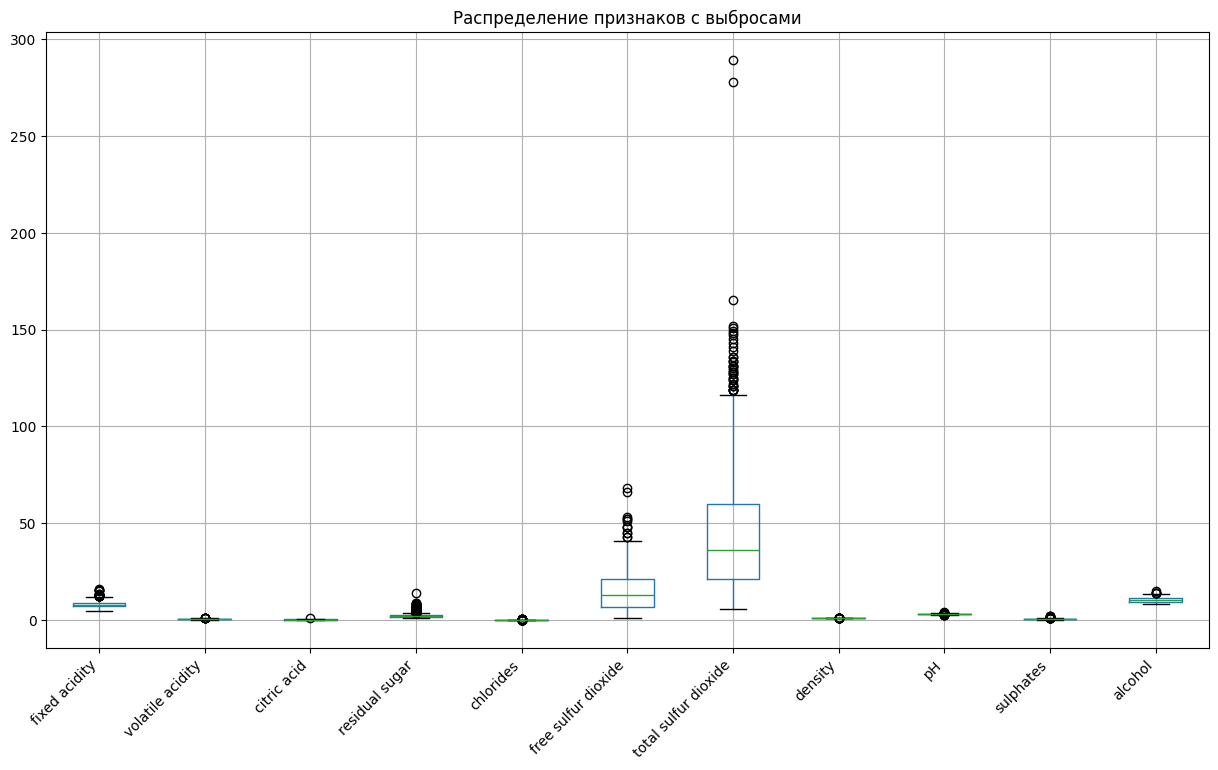

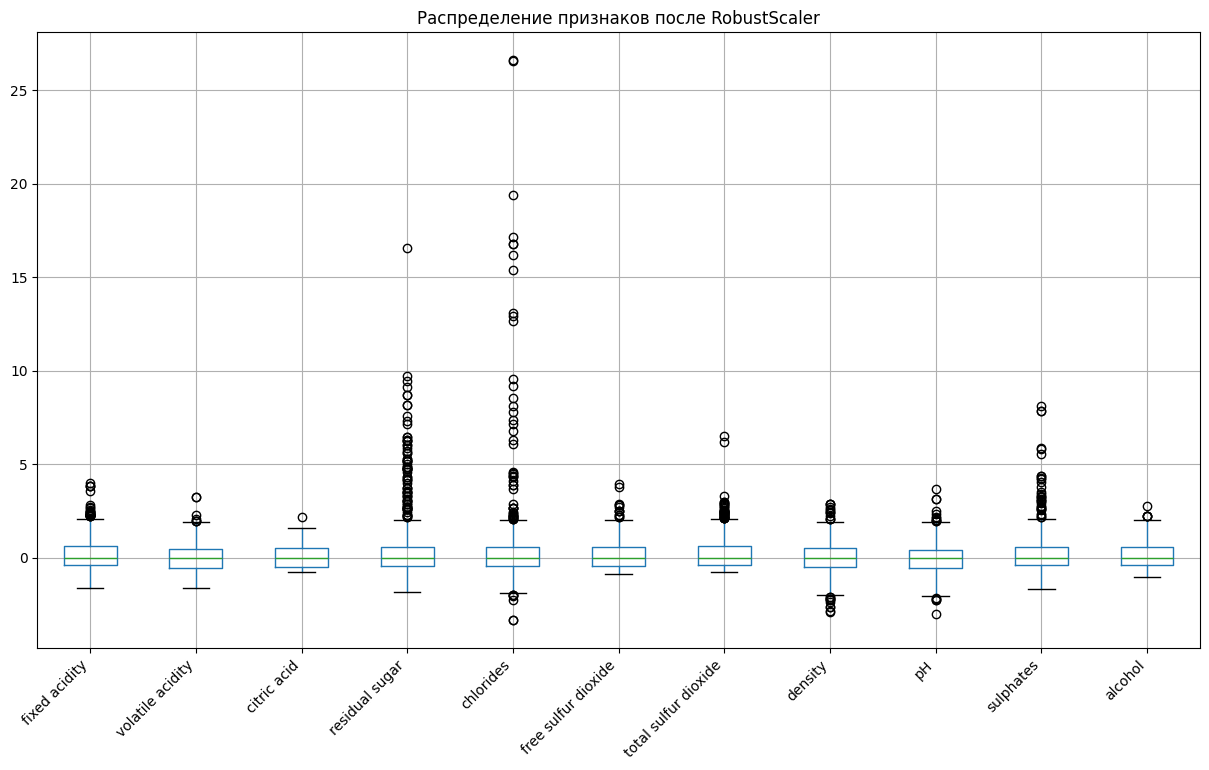

In [ ]:
if 'X_train' in locals():
    plt.figure(figsize=(15, 8))
    X_train.boxplot()
    plt.title('Распределение признаков с выбросами')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    scaler_robust = RobustScaler()
    X_train_scaled = scaler_robust.fit_transform(X_train)
    X_val_scaled = scaler_robust.transform(X_val)
    X_test_scaled = scaler_robust.transform(X_test)

    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    plt.figure(figsize=(15, 8))
    X_train.boxplot()
    plt.title('Распределение признаков после RobustScaler')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("Выборки не созданы, выбросы не обработаны.")

### 6. Стандартизация/нормализация

In [ ]:
if 'X_train' in locals():
    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(X_train)
    X_val_final = scaler.transform(X_val)
    X_test_final = scaler.transform(X_test)

    X_train_final = pd.DataFrame(X_train_final, columns=X_train.columns)
    X_val_final = pd.DataFrame(X_val_final, columns=X_val.columns)
    X_test_final = pd.DataFrame(X_test_final, columns=X_test.columns)

    # Сохраняем скейлер
    with open('scaler.pkl', 'wb') as f:
        pickle.dump(scaler, f)
    print("Стандартизатор (scaler.pkl) сохранен.")
else:
    print("Выборки не созданы, стандартизация не выполнена.")

Стандартизатор (scaler.pkl) сохранен.


### 7. Дополнительно (примеры)

In [ ]:
# Проверка мультиколлинеарности (VIF - требует statsmodels)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# if 'X_train_final' in locals():
#     vif_data = pd.DataFrame()
#     vif_data["feature"] = X_train_final.columns
#     vif_data["VIF"] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
#     print("\nVariance Inflation Factor (VIF):\n", vif_data)

# Создание новых признаков (пример)
# if 'X_train_final' in locals():
#     X_train_final['alcohol_acid_ratio'] = X_train_final['alcohol'] / X_train_final['fixed acidity']
#     X_val_final['alcohol_acid_ratio'] = X_val_final['alcohol'] / X_val_final['fixed acidity']
#     X_test_final['alcohol_acid_ratio'] = X_test_final['alcohol'] / X_test_final['fixed acidity']
#     print("\nПризнак 'alcohol_acid_ratio' создан.")

### Обучение машинных моделей

In [ ]:
if 'X_train_final' in locals():
    models = {
        "DummyClassifier": DummyClassifier(strategy="most_frequent"),
        "LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(random_state=42),
        "GradientBoosting": GradientBoostingClassifier(random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "KNeighbors": KNeighborsClassifier(),
        "MLPClassifier": MLPClassifier(random_state=42, max_iter=1000),
    }

    results = {}

    for name, model in models.items():
        print(f"\nОбучение модели: {name}")
        model.fit(X_train_final, y_train)
        y_pred = model.predict(X_val_final)
        y_proba = model.predict_proba(X_val_final) if hasattr(model, 'predict_proba') else None

        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred, average='weighted')
        roc_auc = roc_auc_score(y_val, y_proba, multi_class='ovr') if y_proba is not None else 'N/A'

        results[name] = {
            "accuracy": accuracy,
            "f1_score": f1,
            "roc_auc": roc_auc
        }
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  F1-score: {f1:.4f}")
        print(f"  ROC AUC: {roc_auc}")

    print("\nСводка результатов:\n", pd.DataFrame(results).T)

    # Выбор лучшей модели на основе F1-score
    best_model_name = max(results, key=lambda name: results[name]['f1_score'])
    best_model = models[best_model_name]
    print(f"\nЛучшая модель по F1-score: {best_model_name}")

    # Гиперпараметрическая оптимизация для лучшей модели (пример с GridSearchCV)
    if best_model_name == "RandomForest":
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
        grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train_final, y_train)
        best_model = grid_search.best_estimator_
        print("\nОптимизированная модель (RandomForest) с лучшими параметрами:\n", best_model)
    elif best_model_name == "LogisticRegression":
        param_grid = {
            'C': [0.1, 1.0, 10.0],
            'solver': ['liblinear', 'lbfgs']
        }
        grid_search = GridSearchCV(best_model, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1)
        grid_search.fit(X_train_final, y_train)
        best_model = grid_search.best_estimator_
        print("\nОптимизированная модель (LogisticRegression) с лучшими параметрами:\n", best_model)

    # Оценка лучшей модели на тестовой выборке
    y_pred_test = best_model.predict(X_test_final)
    y_proba_test = best_model.predict_proba(X_test_final) if hasattr(best_model, 'predict_proba') else None

    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    test_roc_auc = roc_auc_score(y_test, y_proba_test, multi_class='ovr') if y_proba_test is not None else 'N/A'

    print(f"\nИтоговая оценка лучшей модели ({best_model_name}) на тестовой выборке:")
    print(f"  Accuracy: {test_accuracy:.4f}")
    print(f"  F1-score: {test_f1:.4f}")
    print(f"  ROC AUC: {test_roc_auc}")

    # Сохранение обученной модели
    with open('best_wine_quality_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
    print("Обученная модель (best_wine_quality_model.pkl) сохранена.")

else:
    print("Подготовленные данные для обучения не найдены. Обучение моделей не выполнено.")


Обучение модели: DummyClassifier
  Accuracy: 0.4211
  F1-score: 0.2495
  ROC AUC: 0.5

Обучение модели: LogisticRegression
  Accuracy: 0.5965
  F1-score: 0.5699
  ROC AUC: 0.7862401054591599

Обучение модели: DecisionTree
  Accuracy: 0.5380
  F1-score: 0.5382
  ROC AUC: 0.5937025993034171

Обучение модели: RandomForest
  Accuracy: 0.6316
  F1-score: 0.6152
  ROC AUC: 0.6871694262836757

Обучение модели: GradientBoosting
  Accuracy: 0.5673
  F1-score: 0.5628
  ROC AUC: 0.747198427118973

Обучение модели: SVC
  Accuracy: 0.5906
  F1-score: 0.5670
  ROC AUC: 0.823564131509764

Обучение модели: KNeighbors
  Accuracy: 0.5029
  F1-score: 0.4893
  ROC AUC: 0.6020989728438402

Обучение модели: MLPClassifier
  Accuracy: 0.6316
  F1-score: 0.6238
  ROC AUC: 0.774139820293243

Сводка результатов:
                     accuracy  f1_score   roc_auc
DummyClassifier     0.421053  0.249513  0.500000
LogisticRegression  0.596491  0.569944  0.786240
DecisionTree        0.538012  0.538167  0.593703
Rando

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Использование модели (пример на Flask)

In [ ]:
import pickle
import pandas as pd

def load_model_and_scaler(model_path='best_wine_quality_model.pkl', scaler_path='scaler.pkl'):
    """Загружает обученную модель и стандартизатор."""
    try:
        with open(model_path, 'rb') as f:
            model = pickle.load(f)
        with open(scaler_path, 'rb') as f:
            scaler = pickle.load(f)
        return model, scaler
    except FileNotFoundError:
        print("Ошибка: Файлы модели или стандартизатора не найдены.")
        return None, None

def predict_quality(data: dict, model, scaler):
    """
    Предсказывает качество вина на основе входных данных.
    data: Словарь с признаками вина (например, {'fixed acidity': 7.4, ...})
    """
    if model is None or scaler is None:
        return "Ошибка: Модель или стандартизатор не загружены."

    # Преобразование входных данных в DataFrame
    input_df = pd.DataFrame([data])

    # Важно: признаки должны быть в том же порядке, в каком они были при обучении
    expected_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                        'pH', 'sulphates', 'alcohol']
    for col in expected_columns:
        if col not in input_df.columns:
            # В реальном приложении здесь лучше поднять ошибку или запросить недостающие данные
            input_df[col] = 0.0 # Заполнить по умолчанию, если признак отсутствует

    input_df = input_df[expected_columns] # Гарантируем порядок колонок

    # Применение того же стандартизатора, который использовался при обучении
    input_scaled = scaler.transform(input_df)

    # Предсказание
    prediction = model.predict(input_scaled)
    return prediction[0]

# Пример использования (в Flask сервере это будет в endpoint)
if __name__ == '__main__':
    loaded_model, loaded_scaler = load_model_and_scaler()

    if loaded_model and loaded_scaler:
        sample_wine_data = {
            'fixed acidity': 7.4,
            'volatile acidity': 0.70,
            'citric acid': 0.00,
            'residual sugar': 1.9,
            'chlorides': 0.076,
            'free sulfur dioxide': 11.0,
            'total sulfur dioxide': 34.0,
            'density': 0.9978,
            'pH': 3.51,
            'sulphates': 0.56,
            'alcohol': 9.4
        }
        predicted_quality = predict_quality(sample_wine_data, loaded_model, loaded_scaler)
        print(f"\nПредсказанное качество вина: {predicted_quality}")


Предсказанное качество вина: 5


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
